In [84]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import cv2

from sklearn.metrics import classification_report
import image
from PIL import Image

Initialiser ce qui pourrait être utile

In [85]:
IMGSIZE=200                                                                     #taille normalisée 
Categories=['good','bad']                                                       #étiquettes
flat_data_arr=[np.zeros(IMGSIZE*IMGSIZE*3)]                                     #tableau des images
target_arr=[]                                                                   #tableau des étiquettes 
datadir='Stage_analyse_image/plot/'                                             #chemin de la bas

Charger et normaliser les images de la base

In [86]:
for i in Categories:
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=plt.imread(os.path.join(path,img)) 
        img_resized=np.resize(img_array,(IMGSIZE,IMGSIZE,3)) 
        flat_data_arr=np.append(flat_data_arr, [img_resized.flatten()], axis=0)
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully')


loading... category : good
loaded category:good successfully
loading... category : bad
loaded category:bad successfully


In [87]:
flat_data_arr=flat_data_arr[1:]
flat_data = np.asarray(flat_data_arr, dtype=np.uint8)
target=np.array(target_arr) 

Convertir en Data Frame

In [88]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(155, 120001)

Séparer les données en données d'entrées et données de sorties

In [89]:
#input data (toutes les colonnes sauf la dernière)
x=df.iloc[:,:-1]  
#output data (dernière colonne)
y=df.iloc[:,-1]

#x et y seront utiliser pour former un modèle d'apprentissage automatique

Séparer en base de test et base d'entraînement

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=77, stratify=y) 

Définition de la grille de paramètre

In [91]:
param_grid={'C':[0.1,1,10,100], 'gamma':[0.0001,0.001,0.1,1], 'kernel':['rbf','poly']} #inutilisé

Création d'un classifier SVM

In [92]:
svc=svm.SVC(probability=True) 

Création d'un modèle utilisant GridSearchCV avec param_grid pour trouver les meilleurs hyperparamètres

In [93]:
model=GridSearchCV(svc,param_grid) # inutilisé

Entraîner le modèle

In [94]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [95]:
# Tester le modèle en utilisant les données de test
y_pred = svc.predict(x_test) 
  
# Calculer la précision du modèle
accuracy = accuracy_score(y_pred, y_test) 
  
# Afficher la précision du modèle 
print(f"The model is {accuracy*100}% accurate")

The model is 83.87096774193549% accurate


In [96]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
result

,original,predicted
55,1,1
137,1,1
67,1,1
64,1,1
20,0,1
44,1,1
133,1,1
5,0,1
49,1,1
152,1,1


In [97]:
nl=np.zeros(len(Categories))
for i in result.index:
    if result['original'][i]!=result['predicted'][i]:
        nl[result['original'][i]]+=1
#        print(result['original'][i])
np.vstack((Categories,nl))

array([['good', 'bad'],
       ['5.0', '0.0']], dtype='<U32')

In [98]:
#print(classification_report(y_test, y_pred,target_names=Categories))

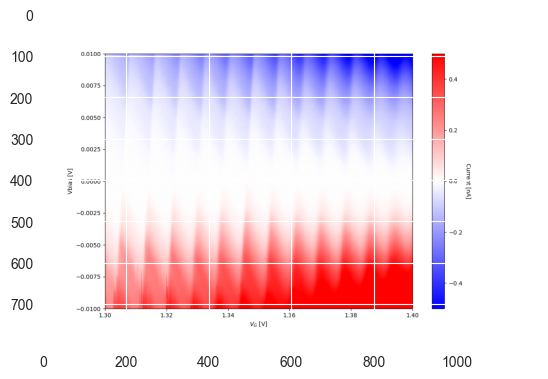

good = 17.78707956376284%
bad = 82.21292043623714%
The predicted image is : bad


In [99]:
path='Stage_analyse_image/plot/bad/H_.png'
img=plt.imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=np.resize(img,(IMGSIZE,IMGSIZE,3)) 
l=[img_resize.flatten()] 
probability=svc.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svc.predict(l)[0]])

In [83]:
path='ColorClassification/testimg'
ml=np.zeros(len(Categories))
#t=[13.0,12.0,12.0,11.0,13.0,12.0,0.0,11.0]
for img in os.listdir(path):
    img=plt.imread(os.path.join(path,img)) 
    #plt.imshow(img) 
    #plt.show() 
    img_resize=np.resize(img,(IMGSIZE,IMGSIZE,3)) 
    l=[img_resize.flatten()] 
    probability=svc.predict_proba(l) 
    #for ind,val in enumerate(Categories): 
    #    print(f'{val} = {probability[0][ind]*100}%') 
    #print("The predicted image is : "+Categories[svc.predict(l)[0]])
    ml[svc.predict(l)[0]]+=1
#m=np.vstack((Categories,t))
np.vstack((Categories,ml))

array([['good', 'bad'],
       ['0.0', '96.0']], dtype='<U32')